In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [5]:
plt.style.use('seaborn') # seaborn 스타일로 변환
sns.set(rc={'figure.figsize' : (15,7)})
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 0. 대회 설명

  - 대회 : https://www.kaggle.com/c/kakr-4th-competition/overview
  - 주제 : 1994년 미국 성인을 대상 소득 예측
  - 문제 정의 : 

# 1. 데이터 불러오기

- age : 나이
- workclass : 고용 형태
- fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
- education : 교육 수준
- education_num : 교육 수준 수치
- marital_status: 결혼 상태
- occupation : 업종
- relationship : 가족 관계
- race : 인종
- sex : 성별
- capital_gain : 양도 소득
- capital_loss : 양도 손실
- hours_per_week : 주당 근무 시간
- native_country : 국적
- income : 수익 (예측해야 하는 값)
  - 50K 초과 : 1
  - 50K 이하 : 0

In [6]:
!kaggle competitions download -c kakr-4th-competition -p ../../08

100%|████████████████████████████████████████| 512k/512k [00:00<00:00, 4.48MB/s]
100%|████████████████████████████████████████| 512k/512k [00:00<00:00, 4.46MB/s]


In [7]:
import zipfile
zip = zipfile.ZipFile(os.path.join('..', '..', '08', 'kakr-4th-competition.zip'))
zip.extractall(path = '../../08')

In [6]:
train = pd.read_csv(os.path.join('..', '..', '08', 'train.csv'))
test = pd.read_csv(os.path.join('..', '..', '08', 'test.csv'))

In [7]:
train.shape, test.shape

((26049, 16), (6512, 15))

In [8]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [12]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000,26049.000,26049.000,26049.000,26049.000,26049.000,26049.000
mean,13024.000,38.569,190304.482,10.088,1087.690,87.733,40.443
std,7519.843,13.671,105966.299,2.568,7388.855,403.230,12.362
min,0.000,17.000,13769.000,1.000,0.000,0.000,1.000
25%,6512.000,28.000,118108.000,9.000,0.000,0.000,40.000
50%,13024.000,37.000,178866.000,10.000,0.000,0.000,40.000
75%,19536.000,48.000,237735.000,12.000,0.000,0.000,45.000
max,26048.000,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [13]:
train.nunique()

id                26049
age                  73
workclass             9
fnlwgt            18422
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        119
capital_loss         90
hours_per_week       93
native_country       41
income                2
dtype: int64

In [22]:
continuous_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

In [23]:
meta = pd.DataFrame(None, columns = ['level'], index = train.columns)
meta.loc[continuous_columns, 'level'] = 'continuous'
meta.loc[categorical_columns, 'level'] = 'categorical'

In [25]:
meta.head()

,level
id,NaN
age,continuous
workclass,categorical
fnlwgt,continuous
education,categorical


# 2. EDA

In [26]:
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


# 2-1. income, 소득수준(target)

In [49]:
train['target'] = train['income'].apply(lambda x : 1 if x == '>50K' else 0)

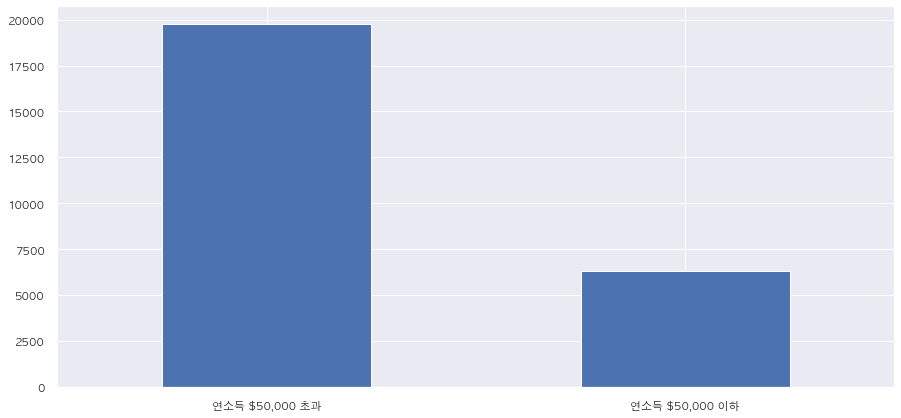

In [54]:
# 생각보다 '연소득 $50,000 초과'가 더 많음
train['target'].value_counts().plot.bar(rot = 0)
plt.xticks([0,1], ['연소득 $50,000 초과', '연소득 $50,000 이하'])
plt.show()

In [57]:
# target의 비율은 약 7.5 : 2.5
# 7.5와 2.5를 나누는 무언가를 찾는 것이 중요할 듯.
train['target'].value_counts() / train.shape[0]

0   0.758
1   0.242
Name: target, dtype: float64

## 2-2. age, 나이

In [ ]:
# 보통 나이와 소득 수준은 비례하는 측면이 있음
# 소득이 보장되는 사회적 위치에 자리잡은 상태에서는 보통 젋은 나이보다는 40대 이상일 가능성이 높음 

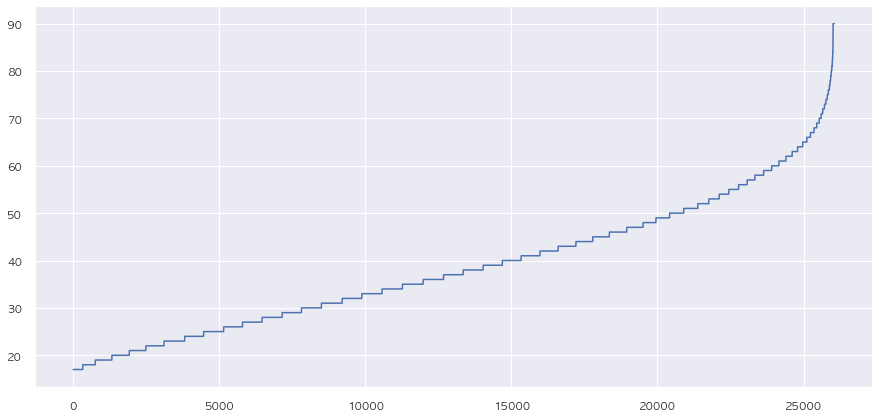

In [37]:
plt.plot(np.sort(train.age))
plt.show()

In [42]:
# 10세별로 나이별 집단 생성
train['age_group'] = train['age'].apply(lambda x : str(x)[0] + '0대')

In [94]:
age_group = train.groupby('age_group').agg({
    'target' : [('연소득 50 초과', (lambda x : np.sum(x))), ('총 인구', 'count')]
})
age_group['연소득 50 초과 비율'] = age_group.iloc[:, 0] / age_group.iloc[:, 1]

In [95]:
# 10대와 20대에서는 연소득 50초과 인구가 거의 없음
# 50대, 40대, 30대, 60대, 70대, 90대, 80대 순으로 비율이 높음
# (10대, 20대), (30대, 40대. 50대, 60대), (70대, 80대, 90대)로 묶을 수 있을 것 같음
age_group

target       연소득 50 초과 비율
          연소득 50 초과  총 인구             
age_group                             
10대               1  1321        0.001
20대             416  6489        0.064
30대            1890  6878        0.275
40대            2133  5726        0.373
50대            1348  3494        0.386
60대             428  1627        0.263
70대              76   411        0.185
80대               7    67        0.104
90대               6    36        0.167

In [128]:
# 20대에서 연소득 50 초과인 사람들의 특징은 무엇일까?
train.loc[(train['age_group'] == '20대') & (train['target'] == 1), 'race'].value_counts().sort_index() / train.loc[train['age_group'] == '20대', 'race'].value_counts().sort_index()

Amer-Indian-Eskimo   0.054
Asian-Pac-Islander   0.072
Black                0.031
Other                0.025
White                0.068
Name: race, dtype: float64

In [130]:
# 20대에서 연소득 50 초과인 사람들의 특징은 무엇일까?
train.loc[(train['age_group'] == '20대') & (train['target'] == 1), 'relationship'].value_counts().sort_index() / train.loc[train['age_group'] == '20대', 'relationship'].value_counts().sort_index()

Husband          0.208
Not-in-family    0.035
Other-relative   0.021
Own-child        0.006
Unmarried        0.018
Wife             0.312
Name: relationship, dtype: float64

In [134]:
# 20대에서 연소득 50 초과인 사람들의 특징은 무엇일까?
train.loc[(train['age_group'] == '20대') & (train['target'] == 1), 'marital_status'].value_counts().sort_index() / train.loc[train['age_group'] == '20대', 'marital_status'].value_counts().sort_index()

Divorced                0.023
Married-AF-spouse       0.625
Married-civ-spouse      0.216
Married-spouse-absent   0.030
Never-married           0.017
Separated               0.035
Widowed                 0.143
Name: marital_status, dtype: float64

# 2-3. workclass, 고용형태

In [147]:
train.workclass.value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

In [157]:
# 고용형태별 target 분포
pd.pivot_table(train, index = 'workclass', columns = 'income', values = 'target', aggfunc = 'count')

income,<=50K,>50K
workclass,,
?,1349.000,153.000
Federal-gov,473.000,292.000
Local-gov,1187.000,505.000
Never-worked,6.000,nan
Private,14130.000,3993.000
Self-emp-inc,381.000,496.000
Self-emp-not-inc,1453.000,577.000
State-gov,754.000,289.000
Without-pay,11.000,nan


In [160]:
pd.pivot_table(train, index = 'age_group', columns = 'workclass', values = 'target', aggfunc = 'count')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
age_group,,,,,,,,,
10대,214.000,7.000,26.000,4.000,999.000,13.000,29.000,27.000,2.000
20대,420.000,104.000,278.000,2.000,5157.000,67.000,223.000,236.000,2.000
30대,174.000,200.000,431.000,nan,5081.000,191.000,524.000,277.000,nan
40대,123.000,237.000,514.000,nan,3756.000,279.000,541.000,275.000,1.000
50대,136.000,160.000,305.000,nan,2126.000,204.000,405.000,157.000,1.000
60대,291.000,47.000,110.000,nan,811.000,86.000,216.000,62.000,4.000
70대,123.000,9.000,21.000,nan,148.000,30.000,71.000,8.000,1.000
80대,15.000,nan,3.000,nan,23.000,7.000,18.000,1.000,nan
90대,6.000,1.000,4.000,nan,22.000,nan,3.000,nan,nan


## 2-4. fnlwgt, 사람 대표성을 나타내는 가중치 (final weight의 약자)

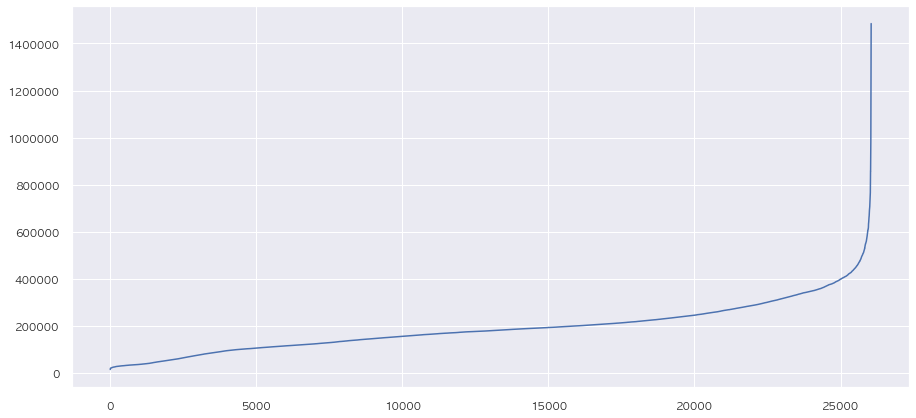

In [172]:
# 이 칼럼이 뜻하는 것은 무엇일까
# 13769 ~ 1484705의 범위를 가짐
plt.plot(np.sort(train.fnlwgt))
plt.show()

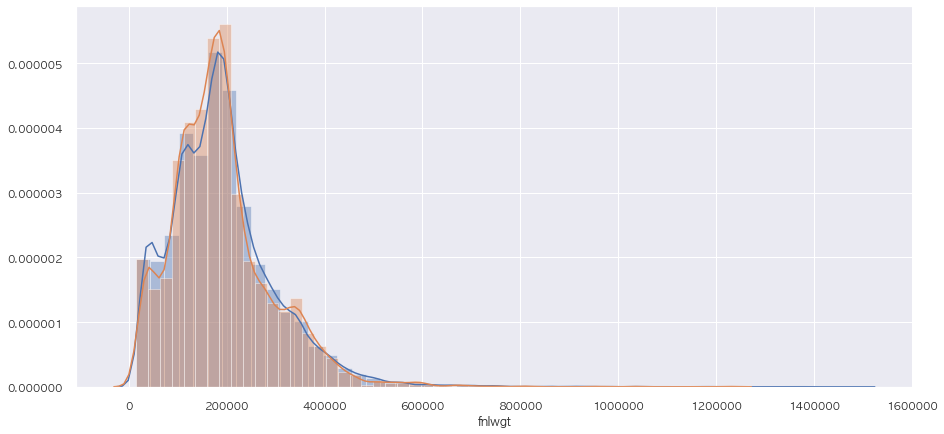

In [186]:
# target 과의 비율 차이는 별로 없어보임
sns.distplot(train.loc[train['target'] == 0, 'fnlwgt'])
sns.distplot(train.loc[train['target'] == 1, 'fnlwgt'])
plt.show()

## 2-5. education, 교육 수준

In [187]:
train.education

0             HS-grad
1                 9th
2        Some-college
3        Some-college
4        Some-college
             ...     
26044            11th
26045       Bachelors
26046         Masters
26047         HS-grad
26048    Some-college
Name: education, Length: 26049, dtype: object

# 제출

In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [200]:
X1 = pd.DataFrame(scaler.fit_transform(train[meta.loc[meta['level'] == 'continuous'].index]))

In [216]:
X_test1 = pd.DataFrame(scaler.transform(test[meta.loc[meta['level'] == 'continuous'].index]))

In [203]:
X2 = pd.get_dummies(train[meta.loc[meta['level'] == 'categorical'].index])

In [217]:
X2_test = pd.get_dummies(test[meta.loc[meta['level'] == 'categorical'].index])

In [234]:
X2

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26045,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26046,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26047,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [236]:
set(X2_test.columns) - set(X2.columns)

{'native_country_Holand-Netherlands'}

In [205]:
X = pd.concat([X1, X2], axis = 1)
X

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.315,0.105,0.533,0.000,0.000,0.602,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000,0.060,0.267,0.000,0.000,0.194,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.014,0.231,0.600,0.000,0.000,0.153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.055,0.093,0.600,0.000,0.000,0.245,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.096,0.074,0.600,0.000,0.000,0.194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,0.548,0.161,0.400,0.000,0.000,0.520,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26045,0.082,0.153,0.800,0.000,0.000,0.398,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26046,0.836,0.103,0.867,0.000,0.000,0.143,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26047,0.123,0.094,0.533,0.000,0.000,0.398,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [237]:
X['native_country_Holand-Netherlands'] = 0

In [219]:
X_test = pd.concat([X_test1, X2_test], axis = 1)

In [246]:
X

,0,1,2,3,4,5,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,native_country_Holand-Netherlands
0,0.315,0.105,0.533,0.000,0.000,0.602,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.000,0.060,0.267,0.000,0.000,0.194,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.014,0.231,0.600,0.000,0.000,0.153,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.055,0.093,0.600,0.000,0.000,0.245,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.096,0.074,0.600,0.000,0.000,0.194,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26044,0.548,0.161,0.400,0.000,0.000,0.520,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26045,0.082,0.153,0.800,0.000,0.000,0.398,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26046,0.836,0.103,0.867,0.000,0.000,0.143,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26047,0.123,0.094,0.533,0.000,0.000,0.398,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [249]:
X_test = X_test[X.columns]

In [209]:
import xgboost
from sklearn import model_selection

In [213]:
y = train['target']

In [207]:
xgb_pars = {
        'objective':'binary:hinge',
        'max_depth':13,
        'learning_rate':0.03,
        'eval_metric':'auc',
        'min_child_weight':1,
        'subsample':0.64,
        'colsample_bytree':0.4,
        'seed':29,
        'reg_lambda':2.79,
        'reg_alpha':0.1,
        'gamma':0,
        'scale_pos_weight':1.68,
        'n_estimators': 600,
        'nthread':-1
}

In [265]:
cv = model_selection.KFold(5, shuffle = True, random_state = 42)

for idx_train, idx_valid in cv.split(X):
    x_train = X.loc[idx_train]
    y_train = y.loc[idx_train]
    x_valid = X.loc[idx_valid]
    y_valid = y.loc[idx_valid]
    
    dtrain = xgboost.DMatrix(x_train, label=y_train)
    dvalid = xgboost.DMatrix(x_valid, label=y_valid)
    
    watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
    model = xgboost.train(xgb_pars, dtrain, 10000, watchlist, early_stopping_rounds = 350, verbose_eval = 10)
    
    break

[0]	train-auc:0.5	valid-auc:0.5
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 350 rounds.
[10]	train-auc:0.5	valid-auc:0.5
[20]	train-auc:0.76526	valid-auc:0.749641
[30]	train-auc:0.842432	valid-auc:0.815726
[40]	train-auc:0.870527	valid-auc:0.826619
[50]	train-auc:0.863407	valid-auc:0.819576
[60]	train-auc:0.853744	valid-auc:0.80771
[70]	train-auc:0.849936	valid-auc:0.798016
[80]	train-auc:0.850009	valid-auc:0.799536
[90]	train-auc:0.849843	valid-auc:0.797398
[100]	train-auc:0.84884	valid-auc:0.788554
[110]	train-auc:0.849063	valid-auc:0.786495
[120]	train-auc:0.849692	valid-auc:0.782921
[130]	train-auc:0.850013	valid-auc:0.781807
[140]	train-auc:0.850251	valid-auc:0.782969
[150]	train-auc:0.851467	valid-auc:0.784632
[160]	train-auc:0.85311	valid-auc:0.782389
[170]	train-auc:0.854589	valid-auc:0.784405
[180]	train-auc:0.856074	valid-auc:0.784086
[190]	train-auc:0.857498	valid-auc:0.783107
[200]	train

In [266]:
dtest = xgboost.DMatrix(X_test)
pred = model.predict(dtest)

In [272]:
sub = pd.read_csv(os.path.join('..', '..', '08', 'sample_submission.csv'))
sub.head()

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [281]:
sub['prediction'] = pred
sub['prediction'] = sub['prediction'].astype(int)

In [283]:
sub.to_csv(os.path.join(os.path.join('..', '..', '08', 'submission_1.csv')), index = False)